In [2]:
import numpy as np
import pylab as p
from scipy import integrate
import matplotlib.pyplot as plt
import seaborn as sns
from utils import plot_circle

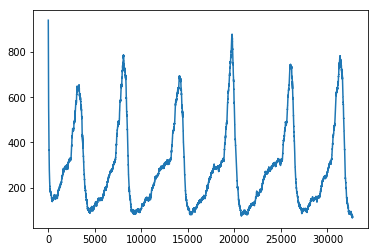

In [3]:
log_file = './results/simple_population_dynamics/exp_1/test_logs/3/log.txt'
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        #if len(line) == 12:
        #    prey_num.append(int(line[9]))
        #    predator_num.append(int(line[11]))
        #elif len(line) == 10:
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))
prey_num = np.array(prey_num)    
predator_num = np.array(predator_num)

plt.plot(prey_num)

In [4]:
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return np.array([ a*X[0] -   b*X[0]*X[1] ,
                  -c*X[1] + d*b*X[0]*X[1] ])

def d2X_dt2(X, t=0):
    """ Return the Jacobian matrix evaluated in X. """
    return np.array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ])

In [22]:
a = 1.59
b = 1.55
c = 1.87
d = 0.44 / 1.55

In [23]:
X_f0 = np.array([     0. ,  0.])
X_f1 = np.array([ c/(d*b), a/b])
all(dX_dt(X_f0) == np.zeros(2) ) and all(dX_dt(X_f1) == np.zeros(2)) # => True

False

In [24]:
#!python
A_f1 = d2X_dt2(X_f1)                    # >>> array([[ 0.  , -2.  ],
                                        #            [ 0.75,  0.  ]])
# whose eigenvalues are +/- sqrt(c*a).j:
lambda1, lambda2 = np.linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
# They are imaginary numbers. The fox and rabbit populations are periodic as follows from further
# analysis. Their period is given by:
T_f1 = 2*np.pi/abs(lambda1)                # >>> 5.130199

In [25]:
A_f0 = d2X_dt2(X_f0)                    # >>> array([[ 1. , -0. ],

In [29]:
t = np.linspace(0, 30000, 29999)              # time
X0 = np.array([1000, 1000])                     # initials conditions: 10 rabbits and 5 foxes
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']         

/home/jun/.virtualenvs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jun/.virtualenvs/pytorch/lib/python3.5/site-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in double_scalars
  after removing the cwd from sys.path.


'Integration successful.'

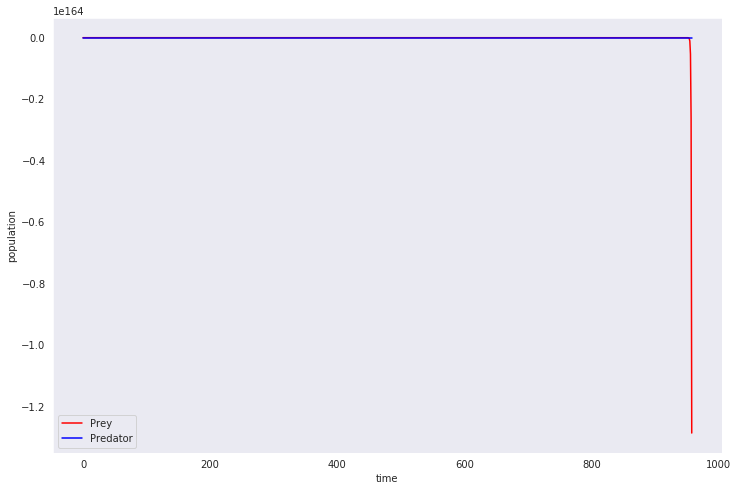

In [30]:
rabbits, foxes = X.T
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
plt.grid()
plt.plot(t, rabbits, 'r-', label='Prey')
plt.plot(t, foxes  , 'b-', label='Predator')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
#p.title('Evolution of fox and rabbit populations')
plt.savefig('lotka_volterra.png', bbox_inches = 'tight',
    pad_inches = 0)

/home/jun/.virtualenvs/pytorch/lib/python3.5/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/home/jun/.virtualenvs/pytorch/lib/python3.5/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')


20


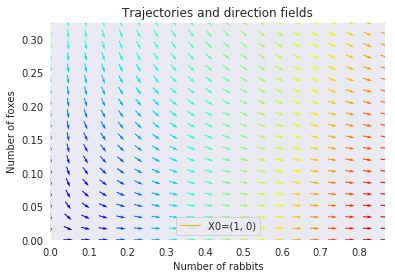

In [13]:
values  = np.linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(np.linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors):
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
    break

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1]
nb_points   = 20

x = np.linspace(0, xmax, nb_points)
y = np.linspace(0, ymax, nb_points)

X1 , Y1  = np.meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
print(len(X1))
M = (np.hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')

In [103]:
X1.shape

(20, 20)

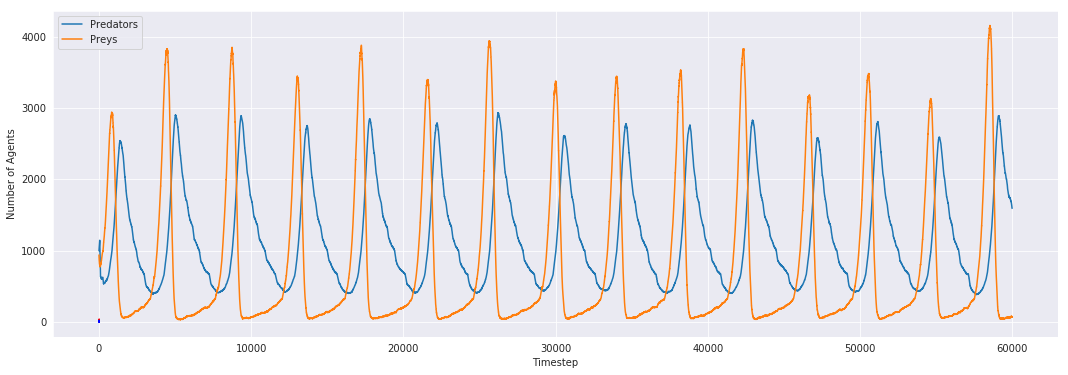

In [47]:
prey_num = []
predator_num = []
log_file = './results/simple_population_dynamics/exp_2/test_logs/0/log.txt'
st = 0
ed = 60000
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        #if len(line) == 12:
        #    prey_num.append(int(line[9]))
        #    predator_num.append(int(line[11]))
        #elif len(line) == 10:
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))
        #elif len(line) == 14:
        #    prey_num.append(int(line[9]))
        #    predator_num.append(int(line[11]))
if ed is None:
    ed = len(predator_num)
else:
    predator_num = predator_num[:ed]
    prey_num = prey_num[:ed]

x = range(len(prey_num))
plt.figure(figsize=(18, 6))
sns.set_style("darkgrid")
plt.plot(x[st:ed], predator_num[st:ed])
plt.plot(x[st:ed], prey_num[st:ed])
plt.plot(t, rabbits, 'r-', label='prey_lotka')
plt.plot(t, foxes  , 'b-', label='Predator_lotka')
plt.legend(['Predators', 'Preys'])
plt.xlabel('Timestep')
plt.ylabel('Number of Agents')
plt.show()

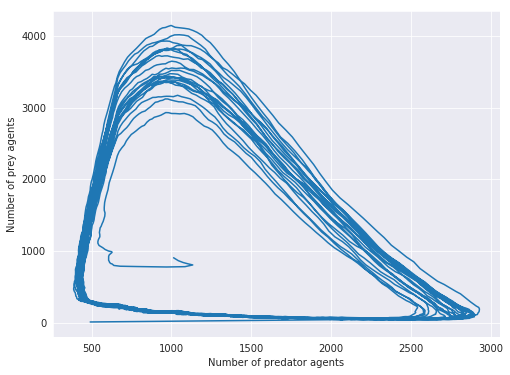

In [18]:
plot_circle('./results/simple_population_dynamics/exp_2/test_logs/0/log.txt', 0)

In [277]:
log_file = './results/simple_population_dynamics/exp_2/test_logs/0/log.txt'
prey_num = []
predator_num = []
with open(log_file)as fin:
    for line in fin:
        line = line.split()
        #if len(line) == 12:
        #    prey_num.append(int(line[9]))
        #    predator_num.append(int(line[11]))
        #elif len(line) == 10:
        prey_num.append(int(line[7]))
        predator_num.append(int(line[9]))

In [139]:
x = 5000
y = 10000
a = 0.006
b = 0.00000035
c = 0.000000625
d = 0.001
step = 0.001  # the smaller the more precise plots are
epochs = 100
xOverTime = []
yOverTime = []
for i in range(int(1 / step) * epochs):
    xOverTime.append(x)
    yOverTime.append(y)
    deltaX = a * x - b * x * y
    deltaY = c * x * y - d * y
    x += step * deltaX
    y += step * deltaY

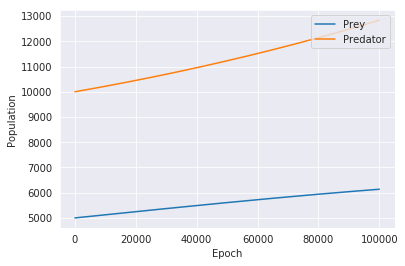

In [140]:
plt.gca().xaxis.grid(True)
plt.gca().yaxis.grid(True)
plt.xlabel("Epoch")
plt.ylabel("Population")
plt.plot(xOverTime, label="Prey")
plt.plot(yOverTime, label="Predator")
plt.legend(loc='upper right')
plt.show()